<a href="https://colab.research.google.com/github/xixiuqi/Crank_Nicolson_scheme_1D_conduction/blob/main/Crank_Nicolson_scheme_1D_conduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Crank-Nicolson scheme for 1D conduction with convection heating at boundaries
**The Crank-Nicolson scheme is used in FDS solid solver**
**Also, if the grid size is studied, the stability of the scheme is important.**

Governing equations for the one demensional conduction is that

$$\frac{\partial T}{\partial t} = α \frac{\partial^2 T}{\partial x^2},$$

The convective heat transfer at the boundaries are Neumann,

$$k\frac{\partial T}{\partial x}\Bigg|_{x = 0} = h_0(T\big|_{x = 0}-T_{∞})$$

$$k\frac{\partial T}{\partial x}\Bigg|_{x = L} = h_L(T\big|_{x = 0}-T_{∞})$$

where $T$ is temperature, $x$ is the space variable, $α$ is the diffusion coefficient of $T$, and $L$ is the length of our one-dimensional space domain.

## Finite difference difference method

Discretizition both time and space as follows:

$$t_n = n \Delta t,~ n = 0, \ldots, N-1,$$

$$x_j = j \Delta x,~ j = 0, \ldots, J-1,$$

where $N$ and $J$ are the number of discrete time and space points in our grid respectively.
$\Delta t$ and $\Delta x$ are the time step and space step respectively and defined as follows:

$$\Delta t = T / N,$$

$$\Delta x = L / J,$$

## The Crank-Nicolson scheme

The time derivative on the left-hand side in grid point  $(j,n)$ is
$$\frac{\partial T}{\partial t}\Bigg|_{x = j \Delta x, t = n \Delta t} \approx \frac{T_j^{n+1} - T_j^n}{\Delta t}.$$

The spatial part of the Crank-Nicolson scheme for the heat equation ($T_t = T_{xx}$) approximates the Laplace operator of the equation and takes the following form

$$\frac{\partial^2 T}{\partial x^2}\Bigg|_{x = j \Delta x, t = n \Delta t} \approx \frac{1}{2 \Delta x^2} \left( T_{j+1}^n - 2 T_j^n + T_{j-1}^n + T_{j+1}^{n+1} - 2 T_j^{n+1} + T_{j-1}^{n+1}\right)$$

Applying this scheme to grid point $(j,n)$ gives the following approximation of the equation:

$$\frac{T_j^{n+1} - T_j^n}{\Delta t} = \frac{α}{2 \Delta x^2} \left( T_{j+1}^n - 2 T_j^n + T_{j-1}^n + T_{j+1}^{n+1} - 2 T_j^{n+1} + T_{j-1}^{n+1}\right)$$

## Linear matrix equation from discretization

Define $\sigma = \frac{α \Delta t}{2 \Delta x^2}$ and reorder the above approximation of the equation:

$$-\sigma T_{j-1}^{n+1} + (1+2\sigma) T_j^{n+1} -\sigma T_{j+1}^{n+1} = \sigma T_{j-1}^n + (1-2\sigma) T_j^n + \sigma T_{j+1}^n + \Delta t f(T_j^n).$$

At the boundaries, equation above should be re-arrange as

$$j=0:~-\sigma T_{-1}^{n+1} + (1+2\sigma) T_0^{n+1} -\sigma T_{1}^{n+1} = \sigma T_{-1}^n + (1-2\sigma) T_0^n + \sigma T_{1}^n$$

$$j=J-1:~-\sigma T_{J-2}^{n+1} + (1+2\sigma) T_{J-1}^{n+1} -\sigma T_{J}^{n+1} = \sigma T_{J-2}^n + (1-2\sigma) T_{J-1}^n + \sigma T_{J}^n$$

where $T_{-1}^n$ and $T_J^n$ lie outside the grid and should be determined by the boundary conditions.

Discretize the boundary condition at $j=0$ with backward difference and $j=J-1$ with forward scheme goes

$$k \frac{T_0^n - T_{-1}^n}{\Delta x} = h_0(T_{0}^n-T_{∞}),$$

$$k \frac{T_J^n - T_{J-1}^n}{\Delta x} = h_L(T_{J-1}^n-T_{∞})$$

as

$$T_{-1}^n = T_0^n - \frac{h_0 \Delta x}{k}(T_{0}^n-T_{∞})$$
$$T_{J}^n = T_{J-1}^n + \frac{h_L \Delta x}{k}(T_{J-1}^n-T_{∞})$$

Similar equations for the $n+1$ variables

At the boundaries, the discretization equation goes as,

$$
\begin{bmatrix}
1+\sigma+\frac{σ h_0 Δx}{k} & -\sigma & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & 0\\
-\sigma & 1+2\sigma & -\sigma & 0 & 0 & \cdots & 0 & 0 & 0 & 0 \\
0 & -\sigma & 1+2\sigma & -\sigma & \cdots & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & \ddots & \ddots & \ddots & \ddots & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & -\sigma & 1+2\sigma & -\sigma \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -\sigma & 1+\sigma - \frac{σ h_L Δx}{k}
\end{bmatrix}
\begin{bmatrix}
T_0^{n+1} \\
T_1^{n+1} \\
T_2^{n+1} \\
\vdots \\
T_{J-2}^{n+1} \\
T_{J-1}^{n+1}
\end{bmatrix} =
\begin{bmatrix}
1-\sigma - \frac{σ h_0 Δx}{k} & \sigma & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & 0\\
\sigma & 1-2\sigma & \sigma & 0 & 0 & \cdots & 0 & 0 & 0 & 0 \\
0 & \sigma & 1-2\sigma & \sigma & \cdots & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & \ddots & \ddots & \ddots & \ddots & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & \sigma & 1-2\sigma & \sigma \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \sigma & 1-\sigma + \frac{σ h_L Δx}{k}
\end{bmatrix}
\begin{bmatrix}
T_0^{n} \\
T_1^{n} \\
T_2^{n} \\
\vdots \\
T_{J-2}^{n} \\
T_{J-1}^{n}
\end{bmatrix} +
\begin{bmatrix}
\frac{2 \sigma h_0 Δx T_{∞}}{k} \\
0 \\
0 \\
\vdots \\
0 \\
-\frac{2 \sigma h_L Δx T_{∞}}{k}
\end{bmatrix}
$$

Define the matrix on the left-hand side $A$, the one on the right-hand side $B$,
and the vector on the right-hand side $f^n$.
Using this notation we can write the above system as

$$A \mathbf{U}^{n+1} = B \mathbf{U}^n + f^n$$

To solve the equation, the linear system goes

$$\mathbf{U}^{n+1} = A^{-1} \left( B \mathbf{U}^n + f^n \right)$$

The stability analysis for Crank-Nicolson scheme can be found https://www.math.uci.edu/~chenlong/226/ParabolicFDM.pdf. It is proved that the scheme is uncontitionally stable in $l^2$ norm space.


### Import the libraries

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

np.set_printoptions(precision=3)


### Define the grid



In [ ]:
Length = 0.5
J = 100
dx = float(Length)/float(J-1)
x_grid = np.array([j*dx for j in range(J)])

Time = 20
N = 1000
dt = float(Time)/float(N-1)
t_grid = np.array([n*dt for n in range(N)])

### Thermal parameters

Thermal diffusivity of PMMA is chosen as $2 × 10^{-5} m^2/s$ and conducvitity is chosen as $0.2 W/(m K)$.

For the boundry conditions, at $x=0$, the convective heat transfer coeffieint as $15 W/(m^2 K)$ is applied and semi-infinite boundary condition is appled at $x=L$ as $\dot{q}^{\prime \prime} = 0$.

The ambient temperature is chosen as 593.15 K.

In [ ]:
alpha = 2E-5
k = 0.2
h_0 = 15
h_L = 0
T_infity = 593.15

sigma_T = float(alpha*dt)/float((2.*dx*dx))


### Initial conditions

In [ ]:
T_init = 293.15
T =  np.array([T_init for i in range(J)])

### Create marixes

In [ ]:
x_0_con = sigma_T*h_0*dx/k
x_L_con = sigma_T*h_L*dx/k

A_T = np.diagflat([-sigma_T for i in range(J-1)], -1) +\
      np.diagflat([1.+sigma_T+x_0_con]+[1.+2.*sigma_T for i in range(J-2)]+[1.+sigma_T-x_L_con]) +\
      np.diagflat([-sigma_T for i in range(J-1)], 1)

B_T = np.diagflat([sigma_T for i in range(J-1)], -1) +\
      np.diagflat([1.-sigma_T-x_0_con]+[1.-2.*sigma_T for i in range(J-2)]+[1.-sigma_T+x_L_con]) +\
      np.diagflat([sigma_T for i in range(J-1)], 1)

f_T = np.array([2*x_0_con*T_infity] + [0]*(J-2) + [-2*x_L_con*T_infity])


In [ ]:
T_record = []

T_record.append(T)

for ti in range(1,N):
    T_new = np.linalg.solve(A_T, B_T.dot(T) + f_T)

    T = T_new

    T_record.append(T)


### Analysical solution

When setting the convective heat flux at $x=0$ into a value, and set the boundary condition at $x=L$ as 0 (semi-infinite), the analytical solution is

\begin{aligned}
\frac{T(x, t)-T_i}{T_{\infty}-T_i}= & \operatorname{erfc}\left(\frac{x}{2 \sqrt{\alpha t}}\right) \\
& -\left[\exp \left(\frac{h x}{k}+\frac{h^2 \alpha t}{k^2}\right)\right]\left[\operatorname{erfc}\left(\frac{x}{2 \sqrt{\alpha t}}+\frac{h \sqrt{\alpha t}}{k}\right)\right]
\end{aligned}

The figure attached shows the comparasion between analytical and numerical solutions.


In [ ]:
import math

analytical_T = []

for time in t_grid:
  analytical_T_x_grid = []
  for x in x_grid:
    Term1 = math.erfc(x/2/math.sqrt(alpha*time))
    Term2 = math.exp(h_0*x/k+h_0**2*alpha*time/k**2)
    Term3 = math.erfc(x/2/math.sqrt(alpha*time)+h_0*math.sqrt(alpha*time)/k)

    analytical_T_x_grid.append(Term1-Term2*Term3)

  analytical_T.append(analytical_T_x_grid)

simulated_T = []

for T in T_record:
  T_normolized = (T-T[-1])/(T_infity-T[-1])
  simulated_T.append(T_normolized)



plt.xlabel('x')
plt.ylabel('Temperature')
plt.plot(x_grid, analytical_T[-1])
plt.plot(x_grid, simulated_T[-1])
plt.show()


The figure shows the error between the analytical and numreical solutions.

In [ ]:
from numpy import linalg as LA

error_in_time = []

for index in range(N):
  error_array = analytical_T[index] - simulated_T[index]
  error_per_time = LA.norm(error_array, np.inf)
  error_in_time.append(error_per_time)

plt.xlabel('time step')
plt.ylabel('Norm error')
plt.plot(t_grid, error_in_time)
plt.show()

### Error analysis

In [ ]:
def simulateT(spatialNumer = 100, timeNumber = 1000):
  Length = 0.5
  J = spatialNumer
  dx = float(Length)/float(J-1)
  x_grid = np.array([j*dx for j in range(J)])

  Time = 20
  N = timeNumber
  dt = float(Time)/float(N-1)
  t_grid = np.array([n*dt for n in range(N)])

  alpha = 2E-5
  k = 0.2
  h_0 = 15
  h_L = 0
  T_infity = 593.15

  sigma_T = float(alpha*dt)/float((2.*dx*dx))

  T_init = 293.15
  T =  np.array([T_init for i in range(J)])

  x_0_con = sigma_T*h_0*dx/k
  x_L_con = sigma_T*h_L*dx/k

  A_T = np.diagflat([-sigma_T for i in range(J-1)], -1) +\
        np.diagflat([1.+sigma_T+x_0_con]+[1.+2.*sigma_T for i in range(J-2)]+[1.+sigma_T-x_L_con]) +\
        np.diagflat([-sigma_T for i in range(J-1)], 1)

  B_T = np.diagflat([sigma_T for i in range(J-1)], -1) +\
        np.diagflat([1.-sigma_T-x_0_con]+[1.-2.*sigma_T for i in range(J-2)]+[1.-sigma_T+x_L_con]) +\
        np.diagflat([sigma_T for i in range(J-1)], 1)

  f_T = np.array([2*x_0_con*T_infity] + [0]*(J-2) + [-2*x_L_con*T_infity])

  T_record = []

  T_record.append(T)

  for ti in range(1,N):
      T_new = np.linalg.solve(A_T, B_T.dot(T) + f_T)

      T = T_new

      T_record.append(T)

  analytical_T = []

  for time in t_grid:
    analytical_T_x_grid = []
    for x in x_grid:
      Term1 = math.erfc(x/2/math.sqrt(alpha*time))
      Term2 = math.exp(h_0*x/k+h_0**2*alpha*time/k**2)
      Term3 = math.erfc(x/2/math.sqrt(alpha*time)+h_0*math.sqrt(alpha*time)/k)

      analytical_T_x_grid.append(Term1-Term2*Term3)

    analytical_T.append(analytical_T_x_grid)

  simulated_T = []

  for T in T_record:
    T_normolized = (T-T[-1])/(T_infity-T[-1])
    simulated_T.append(T_normolized)

  error_in_time = []

  for index in range(N):
    error_array = analytical_T[index] - simulated_T[index]
    error_per_time = LA.norm(error_array, np.inf)
    error_in_time.append(error_per_time)

  return T_record


The The figure shows the error between the analytical and numreical solutions.

In [ ]:
error_with_dx = []

for spatialNumer in np.arange(50,500,20):
  error_with_dx_per = error_generation(spatialNumer)
  error_with_dx.append(error_with_dx_per)


In [ ]:
for item in error_with_dx:
  plt.plot(t_grid, np.asarray(item))
  plt.xlabel('time step')
  plt.ylabel('Norm error')

In [ ]:
norm_error_at_20_s = []

for item in error_with_dx:
  norm_error_at_20_s.append(item[-1])

plt.plot(np.arange(50,500,20), norm_error_at_20_s)
plt.xlabel('Grid size')
plt.ylabel('Norm error')

The finite-difference form of Fourier number is defined as
$$F o=\frac{\alpha \Delta t}{(\Delta x)^2}$$
The finite-difference form of the Biot number is
$$B i=\frac{h \Delta x}{k}$$

The plot of Fourier number and Biot number for different grids is

In [ ]:
Fo = []
Bi = []

for spatialNumer in np.arange(50,500,20):
  dx = float(Length)/float(spatialNumer-1)
  Fo.append(alpha*dt/dx**2)
  Bi.append(h_0*dx/k)

# Create figure and axis objects
fig, ax1 = plt.subplots()

# Plot data on the first y-axis
ax1.plot(np.arange(50,500,20), Fo, color='tab:blue')
ax1.set_xlabel('Grid size')
ax1.set_ylabel('Fo', color='tab:blue')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
ax2.plot(np.arange(50,500,20), norm_error_at_20_s, color='tab:red')
ax2.set_ylabel('Bi', color='tab:red')

# Show plot
plt.show()

Normolize the error file with Bi number as a prelimilary try

In [ ]:
normolized_error_with_dx = []

for index in range(len(error_with_dx)):
  normolized_error_with_dx_per = np.asarray(error_with_dx[index])/np.asarray(Bi[index])
  normolized_error_with_dx.append(normolized_error_with_dx_per)

  plt.plot(normolized_error_with_dx_per, label = str(np.arange(50,500,20)[index]))

plt.xlabel('Time step')
plt.ylabel('Norm error')
plt.legend()

### Analytival solution from F-T

Eigenvale function is that

$$Bi-\xi tan(\xi) = 0$$

The eigenvalue is denoted as $\xi_i$

The solution is

$$ \theta = \sum_{i=1}^{∞} \frac{4 sin(\xi_i)}{2\xi_i + sin(2\xi_i)} exp(-Fo \xi_i^2) cos(\xi_i x^*)$$

$r^{*}$ is the normalized coordinate as$

$$r^{*} = \frac{r}{R}$$

$\theta$ is the normolized temperature

$$\theta = \frac{T-T_a}{T_i-T_a}$$


In [ ]:
from scipy.constants import foot, day
from scipy.optimize import brentq, fsolve
from scipy.optimize import root
import scipy.sparse as sps
import seaborn as sns
import numpy as np

class plane_conv_analytical:
    def __init__(self, alpha, h, k, R, Ta, Ti):
        self.R = R
        self.alpha = alpha
        self.h = h
        self.R = R
        self.Bi = h*R/k
        self.Ti = Ti
        self.Ta = Ta

    def root_function(self, xi):
        return  self.Bi - xi*np.tan(xi)
#         return (1.0- self.Bi)*np.tan(xi) - xi

    '''
    def find_nth_root(self, i):
        xi_i = brentq(self.root_function,
                      np.pi*.5+np.pi*(i)+1e-6,
                      np.pi*.5+np.pi*(i+1)-1e-6,
#                       rtol = 9*np.finfo(float).eps
                     )
        assert np.abs(self.root_function(xi_i)) < 1e-8, "Root i = "+str(i)+" was not found"
        return xi_i
    '''

    def fond_root_eigenvalue(self):
        xi_i = []

        for init in np.arange(0,10000,0.2):

          sol2 = root(self.root_function, init)

          if sol2.success == True:
            xi_i.append(sol2.x)

        xi_i = np.asarray(xi_i)
        xi_i = np.unique(xi_i.round(decimals=4))
        xi_i = xi_i[xi_i > 0]

        print("The number of eigenvalues is " + str(len(xi_i)))

        return xi_i

    def constant(self,xi):
        return 4.0*np.sin(xi)/(2.0*xi + np.sin(2*xi))

    def theta(self, r_star, Fo):
        theta = 0
        xi_i = self.fond_root_eigenvalue()
        for xi_ in xi_i:
            constant_ = self.constant(xi_)
            theta += constant_*np.exp(-Fo*xi_**2)*np.cos(r_star*xi_)
        return theta

    def temperature(self, r, t):
        Fo = self.alpha*t/self.R**2
        r_star = r/self.R
        return self.Ta + (self.Ti - self.Ta)*self.theta(r_star, Fo)

    def _est_t_cooling(self,Tf):
#         return (self.R**2/(self.alpha*self.constant(self.find_nth_root(0))))*np.log((self.Ti - self.Ta)/(Tf-self.Ta))
        _xi = self.find_nth_root(0)
        _constant = self.constant(_xi)
        return (self.R**2/(self.alpha*_xi**2))*np.log(_constant*(self.Ti - self.Ta)/(Tf - self.Ta))

    def _temp_diff(self, t, Tf):
        return self.temperature(0,t) - Tf

    def t_cooling(self, Tf):
        t_est = self._est_t_cooling(Tf)
#         t_est = 30*day
        if self._temp_diff(t_est, Tf) < .1:
            return t_est
        else:
            t_ = fsolve(self._temp_diff, t_est+10*day, args = (Tf),
                        xtol = 1e-16
                       )[0]
            assert self._temp_diff(t_, Tf) < .0001, "Temperature diff is too large"
            return t_

In [ ]:
sol = plane_conv_analytical(2E-5, 15, 0.2, 0.5, 593.15, 293.15)

sol.temperature(0.5, np.linspace(0,2,1))

The number of eigenvalues is 3189


array([293.864])

In [ ]:
analytical_surface_T = sol.temperature(0.5, np.linspace(0,20,1000))

The number of eigenvalues is 3189


<ipython-input-10-10018faadae8>:52: RuntimeWarning: invalid value encountered in scalar divide
  Term1 = math.erfc(x/2/math.sqrt(alpha*time))
<ipython-input-10-10018faadae8>:54: RuntimeWarning: invalid value encountered in scalar divide
  Term3 = math.erfc(x/2/math.sqrt(alpha*time)+h_0*math.sqrt(alpha*time)/k)
<ipython-input-10-10018faadae8>:52: RuntimeWarning: divide by zero encountered in scalar divide
  Term1 = math.erfc(x/2/math.sqrt(alpha*time))
<ipython-input-10-10018faadae8>:54: RuntimeWarning: divide by zero encountered in scalar divide
  Term3 = math.erfc(x/2/math.sqrt(alpha*time)+h_0*math.sqrt(alpha*time)/k)


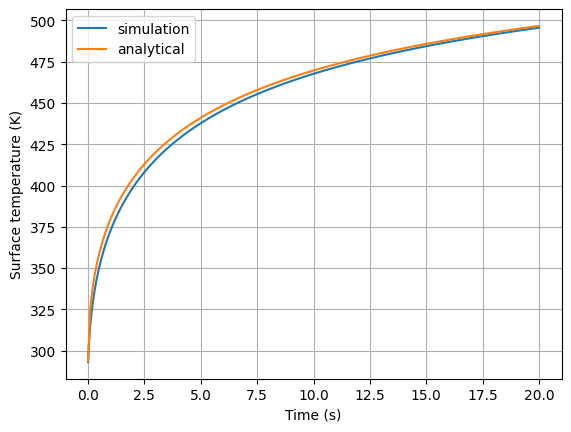

In [ ]:
T_record = simulateT(400,4000)

simulated_surface_T = []

for T in T_record:
  simulated_surface_T.append(T[0])

plt.xlabel('Time (s)')
plt.ylabel('Surface temperature (K)')
plt.plot(np.linspace(0,20,4000), simulated_surface_T, label = 'simulation')
plt.plot(np.linspace(0,20,200), analytical_surface_T, label = 'analytical')

plt.legend()
plt.grid(True)

plt.show()

In [ ]:
np.geomspace(10,500,10).round()

array([ 10.,  15.,  24.,  37.,  57.,  88., 136., 210., 324., 500.])

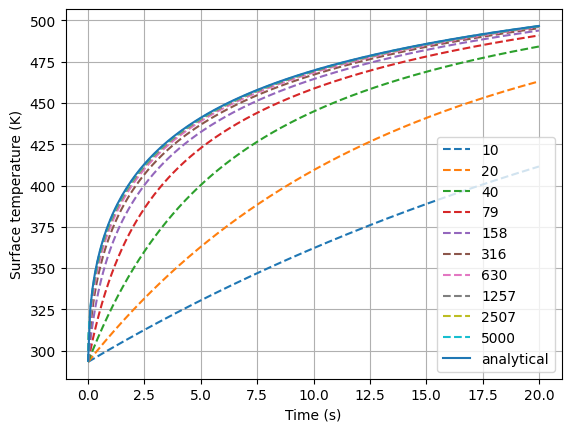

In [ ]:
different_grid_size = []

grid_matrix = np.geomspace(10,5000,10).round().astype(int)

for gridsize in grid_matrix:

  T_record = simulateT(gridsize,1000)

  simulated_surface_T = []

  for T in T_record:
    simulated_surface_T.append(T[0])

  different_grid_size.append(simulated_surface_T)

plt.xlabel('Time (s)')
plt.ylabel('Surface temperature (K)')
index = 0
for simulated_surface_T in different_grid_size:
  plt.plot(np.linspace(0,20,1000), simulated_surface_T,  linestyle='--', label = str(grid_matrix[index]))
  index  = index+1
plt.plot(np.linspace(0,20,200), analytical_surface_T, label = 'analytical')

plt.legend()
plt.grid(True)

plt.show()

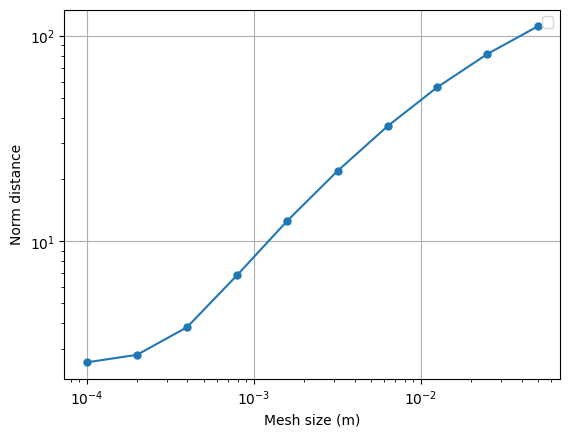

Array has been written to different_grid_size.txt


In [ ]:

plt.xlabel('Mesh size (m)')
plt.ylabel('Norm distance')
index = 0
error = []
for simulated_surface_T in different_grid_size:
  error.append(LA.norm(simulated_surface_T-analytical_surface_T, np.inf))
  index  = index+1

plt.plot(0.5/grid_matrix, error, marker = '.', markersize = 10)

plt.legend()
plt.grid(True)
plt.xscale("log")
plt.yscale("log")

plt.show()

# Define the file path
file_path = "different_grid_size.txt"

# Write the array to a text file
np.savetxt(file_path, different_grid_size)

print("Array has been written to", file_path)

### some calculation

The mathematical formulation of the problem is to find $T(x, t)$ is such that

$$
\frac{\partial^2 T(x, t)}{\partial x^2}=\frac{1}{\alpha} \frac{\partial T(x, t)}{\partial t}
$$

at $x = 0$,

$$
-k \frac{\partial T}{\partial x}+h_1 (T-T_{\infty})=0
$$

at $l = L$,

$$
k \frac{\partial T}{\partial x}+h_2 (T-T_{\infty})=0
$$

Initial condition as $T(x,0 = T_i)$.

$\theta$ is the normolized temperature

$$\theta = \frac{T-T_{\infty}}{T_0-T_{\infty}}$$

Governing equation and boundary conditions are

$$
\frac{\partial^2 \theta(x, t)}{\partial x^2}=\frac{1}{\alpha} \frac{\partial \theta(x, t)}{\partial t}
$$

Assume the solution is of the form
$$
\theta(x, t)=X(x) \Gamma(t)
$$

And the equation goes,

$$
\frac{1}{X} \frac{d^2 X}{d x^2}=\frac{1}{\alpha \Gamma} \frac{d \Gamma}{d t}=-\beta^2
$$

The solution for $Γ(t)$ is

$$
\Gamma(t)=\exp \left(-\alpha \beta^2 t\right)
$$

where $X(t)$ is the solution for following ODE,

$$
\frac{d^2 X}{d x^2}+\beta^2 X=0
$$

with

$$
-k \frac{d X}{d x}+h_1 X=0
$$

at $x=0$ and

$$
k \frac{d X}{d x}+h_2 X=0
$$

at $x=L$.

It can be shown that for the above problem the eigenfunctions are

$$
X\left(\beta_m, x\right)=\beta_m \cos \beta_m x+\frac{h_1}{k_1} \sin \beta_m x
$$

And the eigenvalues are the roots of the transcendental equation

$$
\tan \beta_m L=\frac{\beta_m\left(\frac{h_1}{k_1}+\frac{h_2}{k_2}\right)}{\beta_m^2-\frac{h_1}{k_1} \frac{h_2}{k_2}}
$$

Therefore, the complete solution is of the form

$$
θ(x, t)=\sum_{m=1}^{\infty} c_m X\left(\beta_m, x\right) \exp \left(-\alpha \beta_m^2 t\right)
$$




In [ ]:
import numpy as np
from scipy.optimize import root

def your_funcs(x):

    f = x*np.tan(x) - 37

    return f

solutions = []

for init in np.arange(0,200,0.1):

  sol2 = root(your_funcs, init)

  if sol2.success == True:
    solutions.append(sol2.x)

solutions = np.asarray(solutions)

unique = np.unique(solutions.round(decimals=4))

unique = unique[unique > 0]

print(unique)

[  1.53    4.589   7.65   10.714  13.781  16.851  19.926  23.006  26.089
  29.177  32.27   35.365  38.465  41.568  44.674  47.783  50.894  54.008
  57.123  60.241  63.36   66.481  69.604  72.727  75.852  78.978  82.105
  85.233  88.361  91.49   94.621  97.751 100.882 104.014 107.147 110.279
 113.413 116.546 119.68  122.815 125.949 129.084 132.22  135.355 138.491
 141.627 144.763 147.9   151.037 154.174 157.311 160.448 163.585 166.723
 169.861 172.998 176.136 179.274 182.412 185.551 188.689 191.828 194.966
 198.105 201.244]


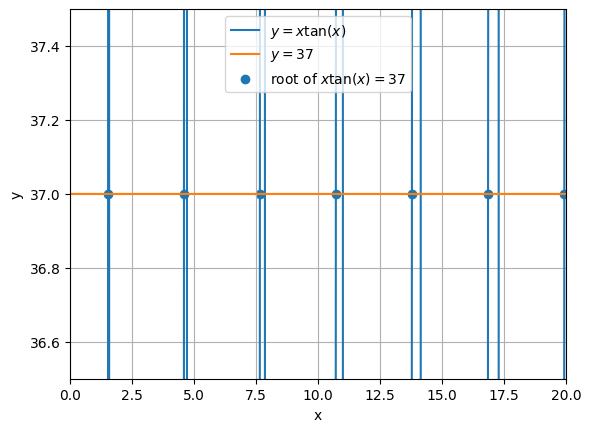

In [ ]:
# Define the range of x values
x = np.linspace(0, 100, 40000)

# Calculate y values for the functions
y1 = x * np.tan(x)
y2 = np.full_like(x, 37)

# Plot the functions
plt.plot(x, y1, label=r'$y = x \tan(x)$')
plt.plot(x, y2, label=r'$y = 37$')
plt.scatter(unique,np.full(len(unique), 37), label = 'root of ' + r'$x \tan(x) = 37$')

# Add labels and legend
plt.xlim(0,20)
plt.ylim(36.5,37.5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()